In this notebook, we will focus on several ways of selecting and evaluation the model. We will look at cross-validation, grid-search, validation curves, and some metrics to evaluate the performance of some models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import cross_val_predict

from sklearn import linear_model

In [3]:
abalone = pd.read_csv("abalone.data", header=None)
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                  'Whole Weight', 'Shucked Weight', ' Viscera Weight',
                  'Shell Weight', 'Ring']
print(abalone.head())
print(abalone.tail())

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245   
1   M   0.350     0.265   0.090        0.2255          0.0995   
2   F   0.530     0.420   0.135        0.6770          0.2565   
3   M   0.440     0.365   0.125        0.5160          0.2155   
4   I   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  
     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

In [4]:
#We have to change the sex, which is a categorical value, 
#to numeric value 0 and 1

abalone['Sex'].replace(['M', 'F', 'I'],[0,1,2], inplace=True)
print(abalone.head())


   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  


In [5]:
# Attribute and target split
X = abalone.drop(['Ring'], axis=1)
y = abalone[['Ring']]
print(X.head())
print(y.head())

   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  
0           0.1010         0.150  
1           0.0485         0.070  
2           0.1415         0.210  
3           0.1140         0.155  
4           0.0395         0.055  
   Ring
0    15
1     7
2     9
3    10
4     7


In [6]:
#convert to array to be passed to numpy

X = np.array(X)
y = np.array(y)

print(X)
print("-----------------------")
print(y)

[[ 0.      0.455   0.365  ...,  0.2245  0.101   0.15  ]
 [ 0.      0.35    0.265  ...,  0.0995  0.0485  0.07  ]
 [ 1.      0.53    0.42   ...,  0.2565  0.1415  0.21  ]
 ..., 
 [ 0.      0.6     0.475  ...,  0.5255  0.2875  0.308 ]
 [ 1.      0.625   0.485  ...,  0.531   0.261   0.296 ]
 [ 0.      0.71    0.555  ...,  0.9455  0.3765  0.495 ]]
-----------------------
[[15]
 [ 7]
 [ 9]
 ..., 
 [ 9]
 [10]
 [12]]


In [54]:
from sklearn.cross_validation import train_test_split 

y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                   random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

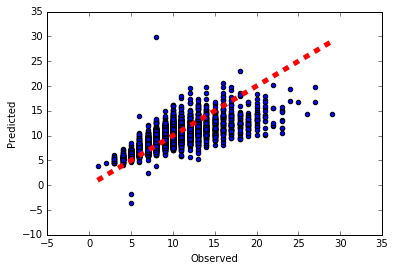

In [7]:
#Plotting cross-validated predictions
#reference: user-guide-0.17 p. 487

lr = linear_model.LinearRegression()
y = y.ravel()
y_predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, y_predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

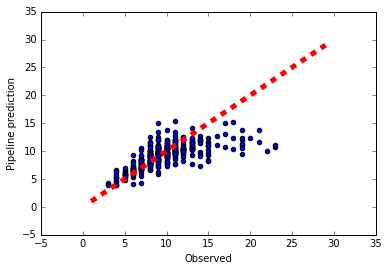

In [39]:
#PIPELINE ANOVA SVM
#Ref: user guide 0.1.7 p. 757

from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

#Anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=4)
clf = svm.SVR(kernel='rbf')

pipeline = make_pipeline(anova_filter, clf)
pipeline.fit(X_train_scaled,y_train)
pipeline_predicted= pipeline.predict(X_test_scaled)

fig, ax = plt.subplots()
ax.scatter(y_test, pipeline_predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Pipeline prediction')

In [49]:
#Grid Search: searching for estimator parameters
#grid searches can find parameters that are not directly learnt by the estimators

#Parameter estimation using grid search with cross-validation
#ref: 0.16.1 p. 840
#Abalone dataset is not a good example to demonstrate the usage of precision
#and recall. Regardless, we can see the steps in working on GridSearch.

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVR

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
#                                                   random_state=0)

tuned_parameters = [{'kernel':['rbf'], 'gamma': [1e-3, 1e-4],
                   'C':[1, 10, 100, 1000]},
                   {'kernel': ['linear'], 'C':[1, 10, 100, 100]}]

scores = ['mean_absolute_error', 'mean_squared_error', 'r2']

#for scoring guides, refer to p. 320

for score in scores:
    print("#Tuning hyper-parameters for %s" % score)
    
    clf = GridSearchCV(SVR(), tuned_parameters, cv=5,
                       scoring = score)
#                       scoring = '%s_weighted' % score)
    
    clf.fit(X_train_scaled, y_train)
    
    print("--------------------------")
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("--------------------------")
    
    

#Tuning hyper-parameters for mean_absolute_error
--------------------------
Best parameters set found on development set:
{'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
--------------------------
#Tuning hyper-parameters for mean_squared_error
--------------------------
Best parameters set found on development set:
{'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
--------------------------
#Tuning hyper-parameters for r2
--------------------------
Best parameters set found on development set:
{'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
--------------------------


In [50]:
print("Grid scores on development set:")

for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
         % (mean_score, scores.std() * 2, params))

Grid scores on development set:
0.345 (+/-0.037) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.225 (+/-0.033) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.469 (+/-0.036) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.341 (+/-0.036) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.523 (+/-0.042) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.001}
0.459 (+/-0.040) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
0.540 (+/-0.053) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
0.510 (+/-0.043) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.0001}
0.505 (+/-0.051) for {'C': 1, 'kernel': 'linear'}
0.508 (+/-0.052) for {'C': 10, 'kernel': 'linear'}
0.508 (+/-0.053) for {'C': 100, 'kernel': 'linear'}
0.508 (+/-0.053) for {'C': 100, 'kernel': 'linear'}


In [ ]:
#other regularization models
#linear_model.ElasticNetCV
#linear_model.LarsCV
#linear_model.LassoCV
#linear_model.LassoLarsCV
#linear_model.LogisticRegressionCV
#linear_model.MultiTaskElasticNetCV
#linear_model.MultiTaskLassoCV
#linear_model.OrthogonalMatchingPursuitCV
#linear_model.RidgeCV
#linear_model.RidgeClassifierCV

#ref: user guide 0.16.1 p. 238

#for random forest models, refer to p. 279.

In [91]:
#METRICS FOR PERFORMANCE EVALUATION

ridge = linear_model.Ridge(alpha = 0.0001, fit_intercept=True)
ridgecv = linear_model.RidgeCV(alphas = [1, 0.1, 0.001, 0.0001], fit_intercept=True,
                               store_cv_values=True)
enet = linear_model.ElasticNet(l1_ratio=0.5)
enetcv = linear_model.ElasticNetCV(l1_ratio=0.5, n_alphas = 100)
lars = linear_model.Lars(fit_intercept=True)
larscv = linear_model.LarsCV(fit_intercept=True)




In [92]:
ridge.fit(X_train_scaled, y_train).fit(X_test_scaled, y_test)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
ridgecv.fit(X_scaled,y)

RidgeCV(alphas=[1, 0.1, 0.001, 0.0001], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=True)

In [94]:
enet.fit(X_train_scaled, y_train).fit(X_test_scaled, y_test)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
enetcv.fit(X_scaled,y)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [96]:
lars.fit(X_train_scaled, y_train).fit(X_test_scaled, y_test)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [97]:
larscv.fit(X_scaled,y)

LarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
    positive=False, precompute='auto', verbose=False)

In [99]:
print("Ridge scaled score: " , ridge.score(X_test, y_test)) 
print("Enet scaled score: " , enet.score(X_test, y_test)) 
print("Lars scaled score: " , lars.score(X_test, y_test)) 
print()

print("Ridge score: " , ridge.score(X_test_scaled, y_test)) 
print("Enet score: " , enet.score(X_test_scaled, y_test)) 
print("Lars score: " , lars.score(X_test_scaled, y_test)) 
print()

print("EnetCV:")
print("alpha:", enetcv.alpha_)
print("l1 ratio: ", enetcv.l1_ratio_)
print("MSE: ", enetcv.mse_path_.mean())
print("number of iteration: ", enetcv.n_iter_)
print("score: ", enetcv.score(X_test_scaled, y_test))
print()

print("RidgeCV:")
print("alpha:", ridgecv.alpha_)
print("MSE: ", ridgecv.cv_values_.mean())
print("score: ", ridgecv.score(X_test_scaled, y_test))
print()

print("LarsCV:")
print("alpha:", larscv.alpha_)
print("MSE: ", larscv.cv_mse_path_.mean())
print("number of iteration: ", larscv.n_iter_)
print("score: ", enetcv.score(X_test_scaled, y_test))
print()


Ridge scaled score:  0.184463667896
Enet scaled score:  0.0448613216566
Lars scaled score:  0.184465046162

Ridge score:  0.57970583368
Enet score:  0.386924943388
Lars score:  0.579705833686

EnetCV:
alpha: 0.00404632515448
l1 ratio:  0.5
MSE:  6.33273986352
number of iteration:  424
score:  0.549840298082

RidgeCV:
alpha: 1.0
MSE:  4.93691938284
score:  0.548554514891

LarsCV:
alpha: 0.0
MSE:  6.57752504406
number of iteration:  8
score:  0.549840298082



In [107]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
print("SVR Score: " , svr.score(X_test_scaled, y_test))

lin_svr = LinearSVR()
lin_svr.fit(X_train_scaled, y_train)
print("Linear SVR Score: " , lin_svr.score(X_test_scaled, y_test))

nu_svr = NuSVR()
nu_svr.fit(X_train_scaled, y_train)
print("NuSVR Score: " , nu_svr.score(X_test_scaled, y_test))

SVR Score:  0.578522214308
Linear SVR Score:  0.519465598512
NuSVR Score:  0.579627443473


In [114]:
#Validation curve using SVR

from sklearn.learning_curve import validation_curve

param_range = np.logspace(1, 10, 100)
train_scores, test_scores = validation_curve(SVR(), X_scaled, y, param_name="gamma",
                                            param_range=param_range, cv=10, 
                                            scoring="mean_squared_error", n_jobs=1)

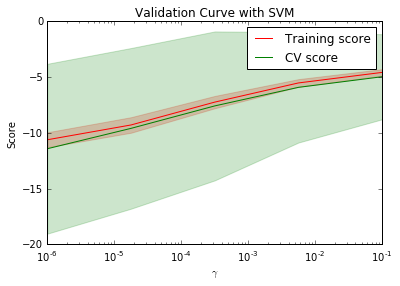

In [112]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha = 0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="CV score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha = 0.2, color="g")
plt.legend(loc="best")
plt.show()


In [ ]:
#Model evaluation: Regression metrics
#p. 335

#explained variance score
#MSE sklearn.metrics.mean_squared_error
#MAE sklearn.metrics.mean_absolute_erroe
#Median Absolute error sklearn.metrics.median_absolute_error
#R2 sklearn.metrics.r2_score



In [52]:
#TRAIN VS TEST ERROR

#Train error vs test error using ElasticNet regression model
#performance measurement using R^2 (variance)
#ref: 0.16.1 p. 842

from sklearn import linear_model

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.5)
train_errors = list()
test_errors = list()
for a in alphas:
    enet.set_params(alpha=a)
    enet.fit(X_train_scaled, y_train)
    train_errors.append(enet.score(X_train_scaled, y_train))
    test_errors.append(enet.score(X_test_scaled, y_test))
    
i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter (alpha) : %s" % alpha_optim)

Optimal regularization parameter (alpha) : 0.00556881399095


In [57]:
#estimate the coef_ on full data with optimal regularization parameter 
#we just arrived.

enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X_scaled, y).coef_
print(coef_)
print("mean: " , coef_.mean())

[-0.32374596  0.          1.0539635   0.4763327   2.84015446 -3.68566726
 -0.71232266  1.71407132]
mean:  0.170348263033


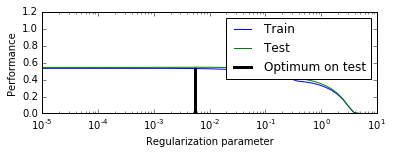

In [58]:
plt.subplot(2,1,1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim(), np.max(test_errors), color='k',
          linewidth=3, label='Optimum on test')
plt.legend(loc='best')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')